# 数据增广
包括翻转、切割和变色在内的通过变形数据来获取多样性，增强模型的泛化能力

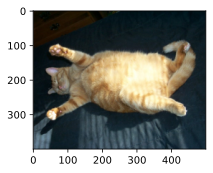

In [4]:
import torch
import torchvision
from PIL import Image
from torch import nn
import matplotlib.pyplot as plt
import My_utils


My_utils.set_figsize()
img = Image.open('./img/cat1.jpg')
plt.imshow(img)

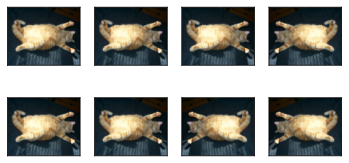

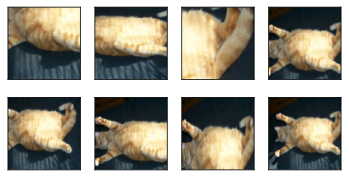

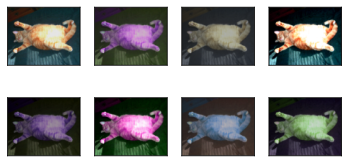

In [2]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows*num_cols)]
    My_utils.show_image(Y, num_rows, num_cols, scale=scale)

apply(img, torchvision.transforms.RandomHorizontalFlip())

shape_aug = torchvision.transforms.RandomResizedCrop((200, 200), scale=(0.1, 1), ratio=(0.5, 2))
# 最后生成的图片是200*200的，scale在图片的10%-100%进行保存，ratio是图片的高宽比1/2或2/1
apply(img, shape_aug)

apply(img, torchvision.transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5))
# 亮度、对比、饱和度、色调

## 使用CIFAR10做图像增广的训练

100%|██████████| 170498071/170498071 [4:10:47<00:00, 11330.84it/s]  


Extracting ./data\cifar-10-python.tar.gz to ./data


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

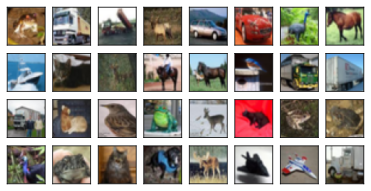

In [5]:
all_images = torchvision.datasets.CIFAR10(
    train=True, root='./data', download=True)
My_utils.show_image([all_images[i][0] for i in range(32)], 4, 8, scale=0.8)

In [6]:
train_augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor()
])

test_augs = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])